In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y=df[["species"]]

In [20]:
df.shape

(150, 5)

C:\Users\aksha\AppData\Local\Temp\ipykernel_16324\2542917523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="species" ,data=df, palette="viridis")


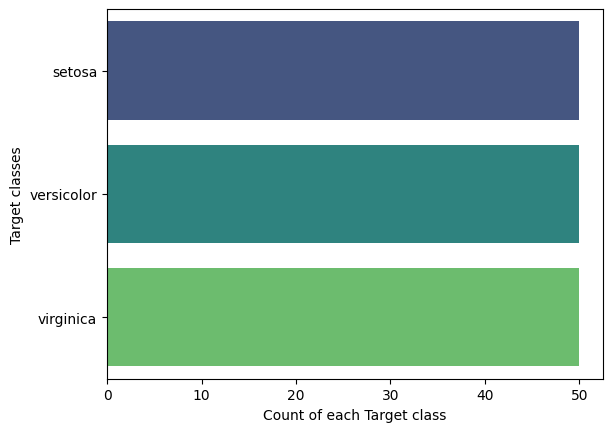

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y="species" ,data=df, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [8]:
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

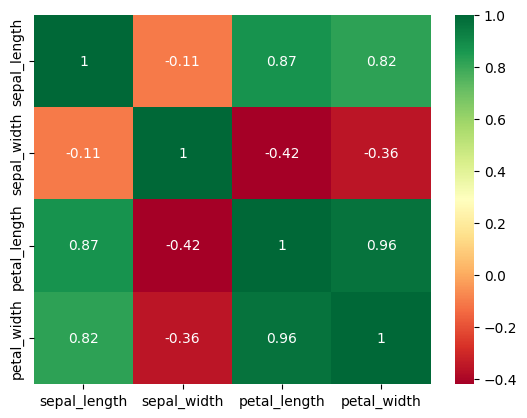

In [9]:
p=sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [12]:
features = X_scaled.T
cov_matrix = np.cov(features)
print(cov_matrix)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [13]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [14]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
print(explained_variances)

[0.7277045209380132, 0.2303052326768064, 0.0368383195762739, 0.005151926808906426]


Text(0.5, 0, 'Principal components')

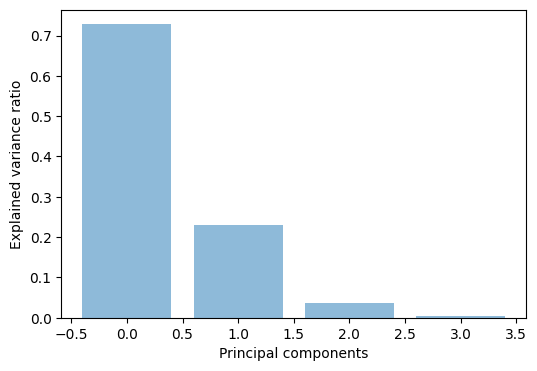

In [15]:
plt.figure(figsize=(6, 4))
plt.bar(range(4), explained_variances,alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

In [34]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


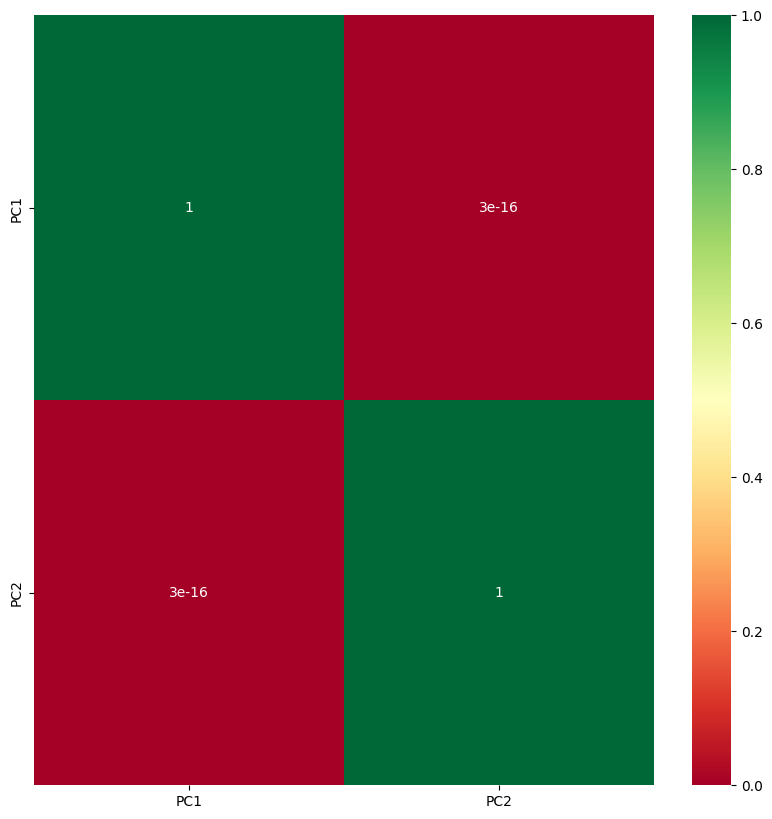

In [35]:
plt.figure(figsize=(10,10))
X=res[["PC1","PC2"]]
p=sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='PC1', ylabel='PC2'>

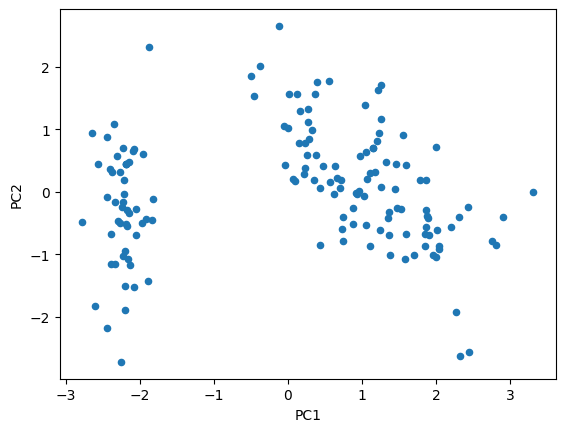

In [36]:
res.plot(kind="scatter", x="PC1",y="PC2")

In [16]:
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y=df[["species"]]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [17]:
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y=df[["species"]]
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(sigma)
X_new=np.dot(u[:,:4],sigma[:,:2])
print(X_new)

[[95.95066751  0.          0.          0.        ]
 [ 0.         17.72295328  0.          0.        ]
 [ 0.          0.          3.46929666  0.        ]
 [ 0.          0.          0.          1.87891236]]
[[-5.91220352e+00  2.30344211e+00]
 [-5.57207573e+00  1.97383104e+00]
 [-5.44648470e+00  2.09653267e+00]
 [-5.43601924e+00  1.87168085e+00]
 [-5.87506555e+00  2.32934799e+00]
 [-6.47699043e+00  2.32552598e+00]
 [-5.51542859e+00  2.07156181e+00]
 [-5.85042297e+00  2.14948016e+00]
 [-5.15851287e+00  1.77642658e+00]
 [-5.64458172e+00  1.99190598e+00]
 [-6.26482670e+00  2.42727947e+00]
 [-5.75150446e+00  2.02142409e+00]
 [-5.48017099e+00  1.97972378e+00]
 [-4.95064168e+00  2.04947793e+00]
 [-6.52528515e+00  2.91774840e+00]
 [-6.78960484e+00  2.82549990e+00]
 [-6.27173006e+00  2.60908548e+00]
 [-5.92899145e+00  2.26896626e+00]
 [-6.64757408e+00  2.39126214e+00]
 [-6.09424306e+00  2.36154331e+00]
 [-6.25352038e+00  2.12203279e+00]
 [-6.07305216e+00  2.27257849e+00]
 [-5.36933796e+00  2.4985